# Black Friday Sales Prediction

In [1]:
# Importing the required libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/black-friday-sales-data/train.csv


In [2]:
bfs=pd.read_csv("/kaggle/input/black-friday-sales-data/train.csv")

In [3]:
bfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Reading information about data

In [4]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
bfs.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
bfs.duplicated().value_counts()

False    550068
dtype: int64

We are having total 550068 number of rows data including NaN value with no duplicated data. So, first task is to convert the given data into useful data.

In [7]:
bfs.rename(columns=str.lower,inplace=True) #Converting all the column names to lowercase for easy use.

In [8]:
bfs.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

## Processing each column individually

### user_id: 



In [9]:
bfs.user_id

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: user_id, Length: 550068, dtype: int64

### product_id: 


In [10]:
bfs.product_id

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: product_id, Length: 550068, dtype: object

### gender: 


In [11]:
bfs.gender.unique()

array(['F', 'M'], dtype=object)

In [12]:
bfs.head(2)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


### age:


In [13]:
bfs.age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

We have total 7 age category customers data.

'0-17', '18-25', '26-35', '36-45', '46-50', '51-55' and '55+'.


### occupation:

Contains Occupation information of customers in the form of masked value format.

In [14]:
bfs.occupation.unique(),len(bfs.occupation.unique()),bfs.occupation.dtype

(array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
         5, 14, 13,  6]),
 21,
 dtype('int64'))

We have 21 different occupation types for customers 

### city_category



In [15]:
bfs.city_category.unique()

array(['A', 'C', 'B'], dtype=object)

### stay_in_current_city_years:


In [16]:
bfs.stay_in_current_city_years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

We have customer who are staying in city from '0', '1', '2', '3', '4+' years.

We  can replace '4+' years to '4'.So that we can get exact number and we can assume that those customer are belonging to current city of 4 years are staying more than 4 years in the current city.

In [17]:
bfs.stay_in_current_city_years=bfs.stay_in_current_city_years.replace("4+",'4').astype(int)
bfs.stay_in_current_city_years.unique()

array([2, 4, 3, 1, 0])

Here, we got 0, 1, 2, 3, 4 years which integer values.

### marital_status:



In [18]:
bfs.marital_status.unique()

array([0, 1])

We assume that **0** means the customer married status is **single** and **1** means the customer is **married**. 

### product_category:





In [19]:
bfs.head(2)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


We have three different product categories columns, product_category_1, product_category_2 and product_category_3. 


In [20]:
bfs[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  int64  
 1   product_category_2  376430 non-null  float64
 2   product_category_3  166821 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.6 MB


Notice that product category having NaN values or empty values. Let's try to fill them by seeing another columns info.

In [21]:
bfs.head(2)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


See we have two columns Gender and occupation. By seeing these two columns we can analyse that which column giving us a useful values to fill the nan values of product categories.

Ex.:

* By seeing the '**age**' column we can identify which product category are mostly used by the particular age of customer and we can fill that category value in place of nan values.
* By seeing the '**occupation**' column we can identify which product category are mostly used by the particular customers depending on their occupation and we can fill that category value inplace of nan values.



In [22]:
a=bfs.groupby('age')['product_category_2'].agg(pd.Series.mode)
b=bfs.groupby('age')['product_category_3'].agg(pd.Series.mode)
c=bfs.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
d=bfs.groupby('occupation')['product_category_3'].agg(pd.Series.mode)

In [23]:
c=bfs.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
a

age
0-17     4.0
18-25    8.0
26-35    8.0
36-45    8.0
46-50    8.0
51-55    8.0
55+      8.0
Name: product_category_2, dtype: float64

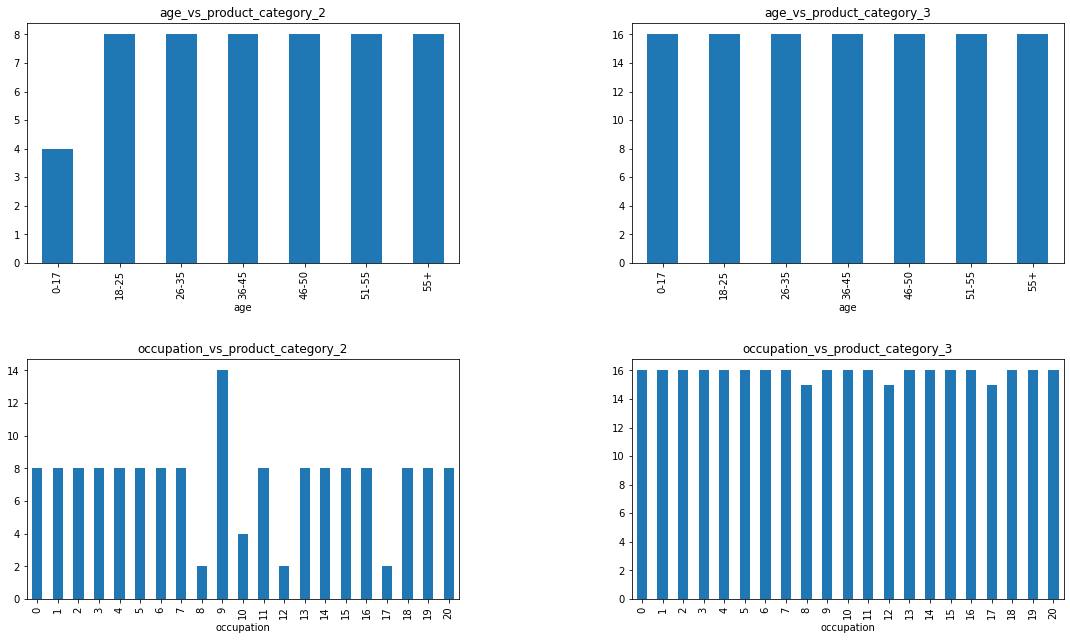

In [24]:
plt.figure(figsize=(18,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,2,1)
a.plot(kind='bar',title="age_vs_product_category_2")
plt.subplot(2,2,2)
b.plot(kind='bar',title="age_vs_product_category_3")
plt.subplot(2,2,3)
c.plot(kind='bar',title="occupation_vs_product_category_2")
plt.subplot(2,2,4)
d.plot(kind='bar',title="occupation_vs_product_category_3")
plt.show()

# Here we trying to fill only product_category_2 and product_category_3 NaN values because product_category_1 having 0 NaN values.

By comparing both '**age**' and '**occupation**' columns, we can see that **on the basis of occupation we are getting more and different product_categories which are mostly repeated.** 

So, **we can fill the nan product_category values corresponding to customer occupation.**


In [25]:
def fill_nan_category(category_colunm):
    x=bfs.groupby('occupation')[category_colunm].agg(pd.Series.mode)
    for i,j in zip(x.index,x):
        bfs.loc[bfs['occupation']==i,category_colunm]=bfs.loc[bfs['occupation']==i,category_colunm].fillna(j)

In [26]:
fill_nan_category('product_category_1')
fill_nan_category('product_category_2')
fill_nan_category('product_category_3')
bfs.product_category_1=bfs.product_category_1.astype(float)

In [27]:
bfs[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  float64
 1   product_category_2  550068 non-null  float64
 2   product_category_3  550068 non-null  float64
dtypes: float64(3)
memory usage: 12.6 MB


Here, we have succesfully filled the NaN values with proper data. 


### purchase:



In [28]:
bfs.purchase.unique(),bfs.purchase.isnull().count()

(array([ 8370, 15200,  1422, ...,   135,   123,   613]), 550068)

In [29]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     550068 non-null  int64  
 1   product_id                  550068 non-null  object 
 2   gender                      550068 non-null  object 
 3   age                         550068 non-null  object 
 4   occupation                  550068 non-null  int64  
 5   city_category               550068 non-null  object 
 6   stay_in_current_city_years  550068 non-null  int64  
 7   marital_status              550068 non-null  int64  
 8   product_category_1          550068 non-null  float64
 9   product_category_2          550068 non-null  float64
 10  product_category_3          550068 non-null  float64
 11  purchase                    550068 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 50.4+ MB


In [30]:
bfs.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8.0,8.0,16.0,7969


In [31]:
bfs.to_csv('./bfs_clean_data.csv') # Saivng cleaned dataset in output directory.

Therefore, we cleaned our data successfully without losing single value, we got total 550068 values.


## Data Visualization

In [32]:
bfs.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8.0,8.0,16.0,7969


### 1) Check Distribution and Outliers of 'purchase'

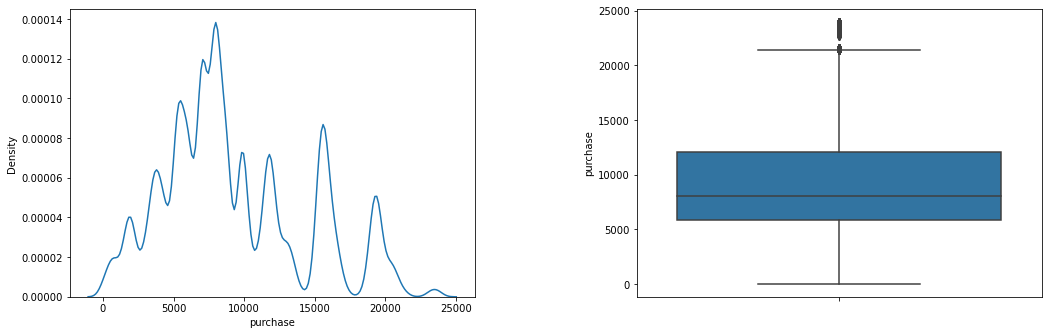

In [33]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,2,1)
sns.kdeplot('purchase',data=bfs)
plt.subplot(1,2,2)
sns.boxplot(y='purchase',data=bfs)
plt.show()

We observed that most of the purchase value is between 5000 to 10000.  

#### 2) Find which kind of customer visits more frequently ? Male or Female?{'M','F'}.

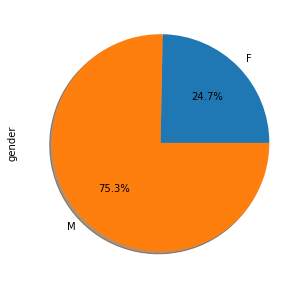

In [34]:
bfs.groupby('gender').agg({'gender':'count'}).gender.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

We  can see that 75% Male customers visits frequently.

#### 3) Purchase Distribution of 'Male' and 'Female' customers.

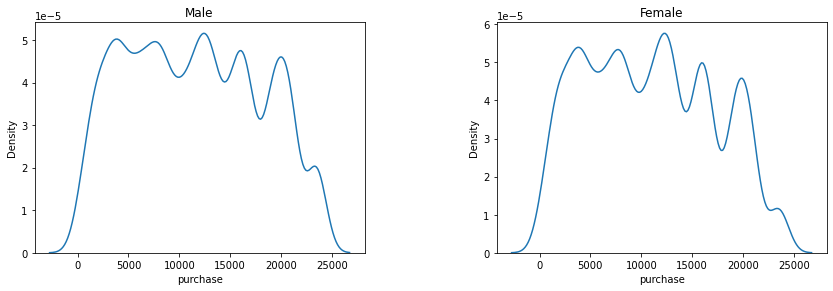

In [35]:
plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
ma=bfs[bfs['gender']=='M'].value_counts('purchase').reset_index()
fe=bfs[bfs['gender']=='F'].value_counts('purchase').to_frame()
plt.subplot(1,2,1)
sns.kdeplot('purchase',data=ma).set_title('Male')
plt.subplot(1,2,2)
sns.kdeplot('purchase',data=fe).set_title('Female')
plt.show()

#### 4) Find which kind of customer purchasing more ? Male or Female?{'M','F'}.

,gender,purchase
0,F,1186232642
1,M,3909580100


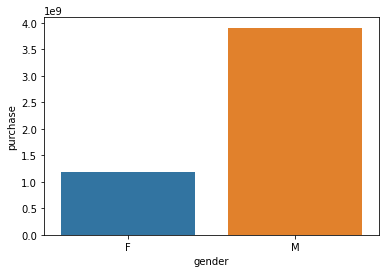

In [36]:
p=bfs.groupby('gender').agg({'purchase':sum}).reset_index()
sns.barplot(x='gender',y='purchase',data=p)
p

We observed that 'Male' customers are purchasing more.

#### 5) Find which Product customer buying most by seaing product_id.

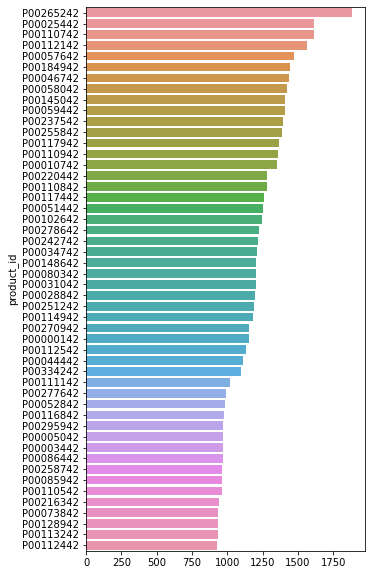

In [37]:
p_id=bfs.value_counts('product_id').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

Here are the 'top 50' product_id's which are customers buying most.

#### 6) Find 'sub_product' which is selling most from each product_category and which customer category buying that product most?{'M','F'}.

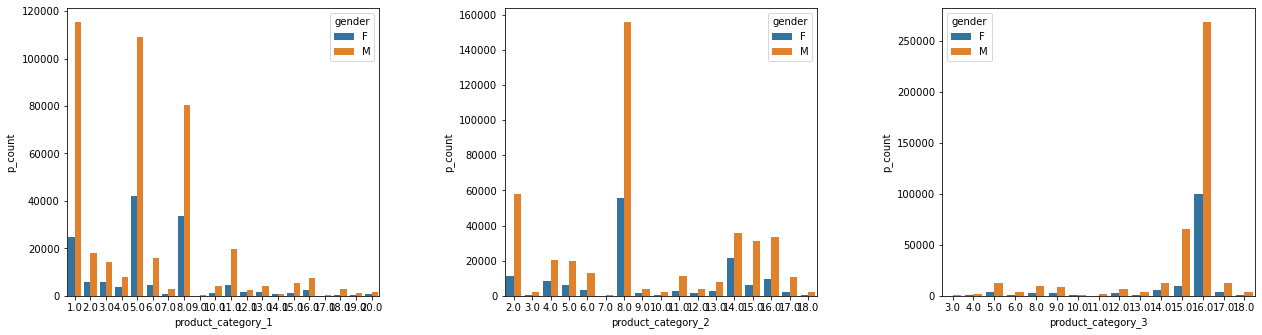

In [38]:
c1=bfs.groupby('gender')['product_category_1'].value_counts().to_frame().rename(columns={"product_category_1":'p_count'}).reset_index()
c2=bfs.groupby('gender')['product_category_2'].value_counts().to_frame().rename(columns={"product_category_2":'p_count'}).reset_index()
c3=bfs.groupby('gender')['product_category_3'].value_counts().to_frame().rename(columns={"product_category_3":'p_count'}).reset_index()
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,3,1)
sns.barplot(x='product_category_1',y='p_count',hue='gender',data=c1)
plt.subplot(1,3,2)
sns.barplot(x='product_category_2',y='p_count',hue='gender',data=c2)
plt.subplot(1,3,3)
sns.barplot(x='product_category_3',y='p_count',hue='gender',data=c3)
plt.show()

Here we can see, we have three product_categories and on x-axis we having some values that are nothing but sub_products of that product_category in masked format.

The graph showing that the sub_product count and the two colours bar are showing that the customer category count wich are buying that product.

We observed that there are some sub_product's selling count is high and most of the 'Male' customers buying that product.

#### 7) Purchase Distribution of Married and UnMarried customers.

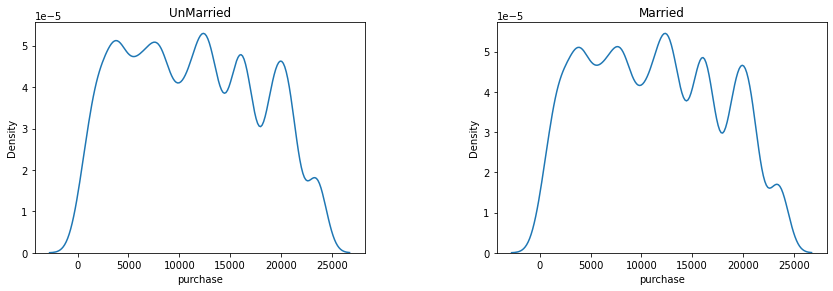

In [39]:
UM_P=bfs[bfs['marital_status']==0].value_counts('purchase').to_frame()
M_P=bfs[bfs['marital_status']==1].value_counts('purchase').to_frame()
plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,2,1)
sns.kdeplot('purchase',data=UM_P).set_title('UnMarried')
plt.subplot(1,2,2)
sns.kdeplot('purchase',data=M_P).set_title('Married')
plt.show()

Purchase distribution of both 'Married' and 'UnMarried' customers are quitely same.

#### 8) Find which customer visits more frequently ? UnMarried or Married? {'UnMarried': 0, 'Married': 1}.

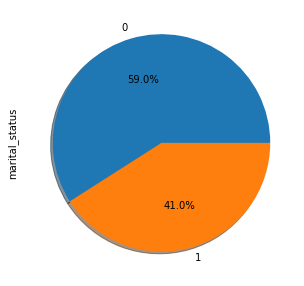

In [40]:
bfs.groupby('marital_status').agg({'marital_status':'count'}).marital_status.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

We observed that 'UnMarried' customers visiting frequently.

#### 9) Find which customer purchasing more (Married or UnMarried) and Top 10 products purcahsed by them.

In [41]:
bfs.head(1)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370


,gender,marital_status,purchase
0,F,0,684154127
1,F,1,502078515
2,M,0,2324773320
3,M,1,1584806780


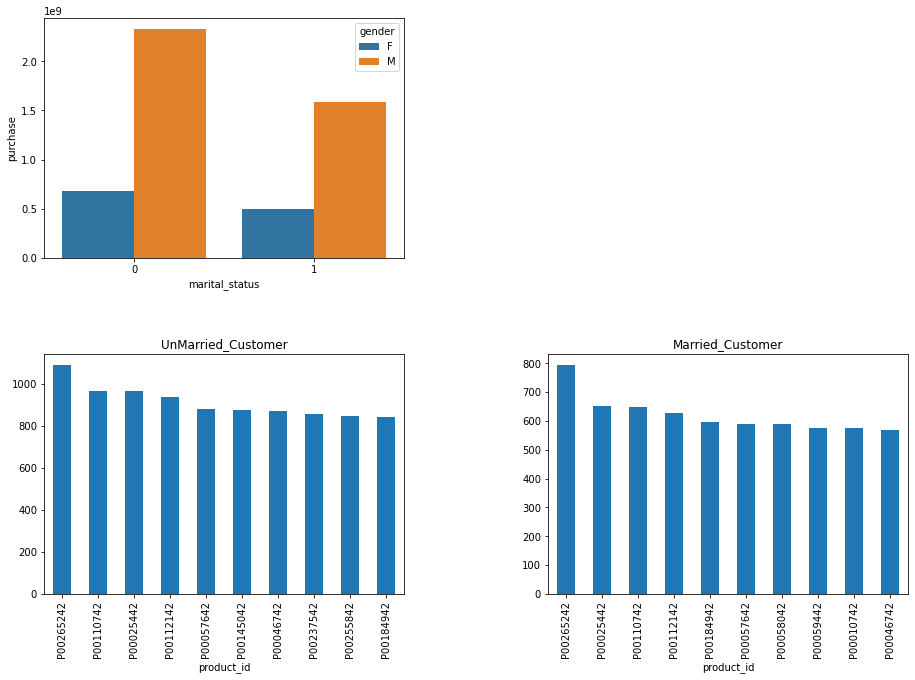

In [42]:
M_UM_P=bfs.groupby(['gender','marital_status']).agg({'purchase':sum}).reset_index()
UM=bfs[bfs['marital_status']==0].value_counts('product_id').nlargest(10)
M=bfs[bfs['marital_status']==1].value_counts('product_id').nlargest(10)
plt.subplots_adjust(left=1,
                    bottom=1,
                    right=3,
                    top=3,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,2,1)
sns.barplot(x='marital_status',y='purchase',hue='gender',data=M_UM_P)
plt.subplot(2,2,3)
UM.plot(x=UM.index,y=UM,kind='bar',title='UnMarried_Customer')
plt.subplot(2,2,4)
M.plot(x=M.index,y=M,kind='bar',title='Married_Customer')
M_UM_P

In the above plot we can see that 'UnMarried' customers purchasing more than the 'Married' customers.

And BarPlot showing that top 10 Product Id's purshased by them frequently.